In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Num GPUs Available: 1
Found 11 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.6364 - loss: 0.6515 - val_accuracy: 0.5000 - val_loss: 1.0155
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9091 - loss: 0.3406 - val_accuracy: 0.5000 - val_loss: 1.3112
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9091 - loss: 0.2698 - val_accuracy: 0.5000 - val_loss: 1.5409


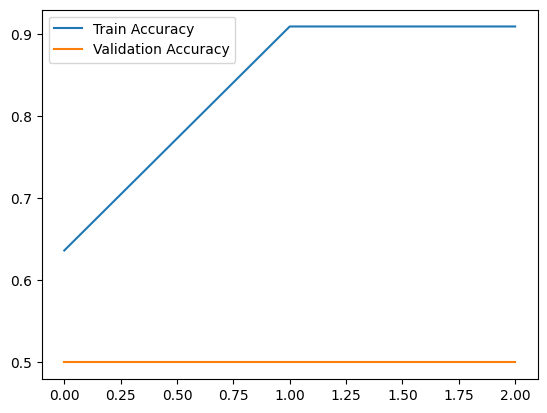

Model training complete and saved as fake_logo_detector.h5


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
import os


print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


data_dir = "/content/drive/MyDrive/dataset "


img_size = (128, 128)
batch_size = 16

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 3  # Reduced epochs for faster execution
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

model.save("fake_logo_detector.h5")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

print("Model training complete and saved as fake_logo_detector.h5")


In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model("/content/fake_logo_detector.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

img_path = "/content/drive/MyDrive/dataset /logo dataset real/vivo logo.png"
try:
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array)[0][0]


    if prediction >= 0.75:
        print("✅ Real Logo")
    elif prediction < 0.15:
        print("❌ Fake Logo")
    else:
        print("🤔 Uncertain - Checking Additional Conditions")
except FileNotFoundError:
    print("Error: Test image not found! Please upload the image and update the path.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Real Logo
